In [19]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd 
from sklearn import metrics

from keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import LSTM, Reshape


In [35]:
# Load the accuracy data
MARS_accuracy_data = np.load('models/Accuracy/MARS_paper.npy')
LSTM_8_accuracy_data = np.load('models/Accuracy/LSTM_8_accuracy.npy')
LSTM_12_accuracy_data = np.load('models/Accuracy/LSTM_12_accuracy.npy')
LSTM_16_accuracy_data = np.load('models/Accuracy/LSTM_16_accuracy.npy')
LSTM_20_accuracy_data = np.load('models/Accuracy/LSTM_20_accuracy.npy')
LSTM_24_accuracy_data = np.load('models/Accuracy/LSTM_24_accuracy.npy')
# LSTM_28_accuracy_data = np.load('models/Accuracy/LSTM_28_accuracy.npy')
# LSTM_32_accuracy_data = np.load('models/Accuracy/LSTM_32_accuracy.npy')

# Extract the data
keypoint_labels = np.array(['Spine Base', 'Spine Mid', 'Neck', 'Head', 'Shoulder L', 'Elbow L', 'Wrist L', 'Shoulder R', 'Elbow R', 'Wrist R', 
                        'Hip L', 'Knee L', 'Ankle L', 'Foot L', 'Hip R', 'Knee R', 'Ankle R', 'Foot R', 'Spine Shoulder', '19 point average'])
n_keypoints = len(keypoint_labels)

# Create a dataframe
df_accuracy = pd.DataFrame({
    'Keypoint': keypoint_labels,
    'MARS MAE_x': MARS_accuracy_data[:, 0],
    'MARS MAE_y': MARS_accuracy_data[:, 2],
    'MARS MAE_z': MARS_accuracy_data[:, 4],
    'LSTM 8 MAE_x': LSTM_8_accuracy_data[:, 0],
    'LSTM 8 MAE_y': LSTM_8_accuracy_data[:, 2],
    'LSTM 8 MAE_z': LSTM_8_accuracy_data[:, 4],
    'LSTM 12 MAE_x': LSTM_12_accuracy_data[:, 0],
    'LSTM 12 MAE_y': LSTM_12_accuracy_data[:, 2],
    'LSTM 12 MAE_z': LSTM_12_accuracy_data[:, 4],
    'LSTM 16 MAE_x': LSTM_16_accuracy_data[:, 0],
    'LSTM 16 MAE_y': LSTM_16_accuracy_data[:, 2],
    'LSTM 16 MAE_z': LSTM_16_accuracy_data[:, 4],
    'LSTM 20 MAE_x': LSTM_20_accuracy_data[:, 0],
    'LSTM 20 MAE_y': LSTM_20_accuracy_data[:, 2],
    'LSTM 20 MAE_z': LSTM_20_accuracy_data[:, 4],
    'LSTM 24 MAE_x': LSTM_24_accuracy_data[:, 0],
    'LSTM 24 MAE_y': LSTM_24_accuracy_data[:, 2],
    'LSTM 24 MAE_z': LSTM_24_accuracy_data[:, 4],
    # 'LSTM 28 MAE_x': LSTM_28_accuracy_data[:, 0],
    # 'LSTM 28 MAE_y': LSTM_28_accuracy_data[:, 2],
    # 'LSTM 28 MAE_z': LSTM_28_accuracy_data[:, 4],
    # 'LSTM 32 MAE_x': LSTM_32_accuracy_data[:, 0],
    # 'LSTM 32 MAE_y': LSTM_32_accuracy_data[:, 2],
    # 'LSTM 32 MAE_z': LSTM_32_accuracy_data[:, 4],
})


print(df_accuracy)
df_accuracy.to_csv('models/Accuracy/accuracy_data.csv', index=False)


            Keypoint  MARS MAE_x  MARS MAE_y  MARS MAE_z  LSTM 8 MAE_x  \
0         Spine Base        5.67        3.55        5.96         3.566   
1          Spine Mid        6.16        3.07        6.80         3.879   
2               Neck        6.78        3.39        7.58         4.403   
3               Head        7.37        3.69        8.20         4.856   
4         Shoulder L        6.92        3.39        6.88         4.516   
5            Elbow L        7.52        4.37        8.19         5.118   
6            Wrist L       10.34        5.07       13.57         7.176   
7         Shoulder R        6.75        3.78        7.04         4.336   
8            Elbow R        7.96        4.73        8.41         5.154   
9            Wrist R       10.74        5.22       14.14         7.191   
10             Hip L        5.63        3.56        5.84         3.563   
11            Knee L        5.56        4.09        3.25         3.826   
12           Ankle L        6.27      

   MARS  LSTM 8  LSTM 12   LSTM 16  LSTM 20  LSTM 24
X  6.99   4.647   4.2865  4.098667    3.425    3.396
Y  4.07   2.937   2.7995  2.731000    2.404    2.442
Z  6.54   4.751   4.3700  4.169667    3.398    3.361


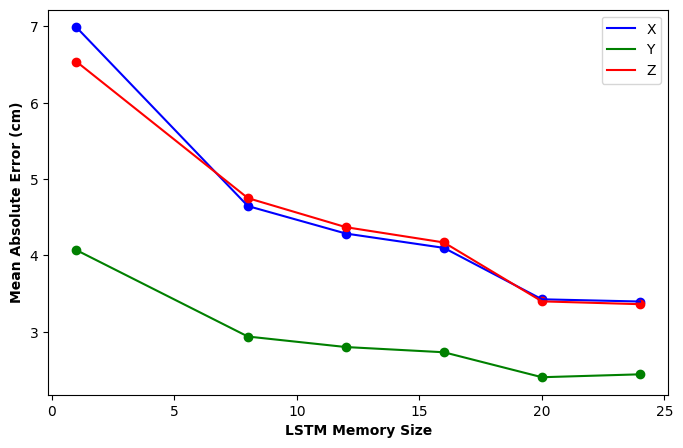

In [37]:
# columns = ['MARS', 'LSTM 8', 'LSTM 12', 'LSTM 16', 'LSTM 20', 'LSTM 24', 'LSTM 28', 'LSTM 32']
# data = np.array([
#         MARS_accuracy_data[19, [0, 2, 4]], LSTM_8_accuracy_data[19, [0, 2, 4]], 
#         LSTM_12_accuracy_data[19, [0, 2, 4]], LSTM_16_accuracy_data[19, [0, 2, 4]],
#         LSTM_20_accuracy_data[19, [0, 2, 4]], LSTM_24_accuracy_data[19, [0, 2, 4]],
#         LSTM_28_accuracy_data[19, [0, 2, 4]], LSTM_32_accuracy_data[19, [0, 2, 4]]
#         ]).T

columns = ['MARS', 'LSTM 8', 'LSTM 12', 'LSTM 16', 'LSTM 20', 'LSTM 24']
data = np.array([MARS_accuracy_data[19, [0, 2, 4]], LSTM_8_accuracy_data[19, [0, 2, 4]], 
        LSTM_12_accuracy_data[19, [0, 2, 4]], LSTM_16_accuracy_data[19, [0, 2, 4]], LSTM_20_accuracy_data[19, [0, 2, 4]], LSTM_24_accuracy_data[19, [0, 2, 4]]]).T

df = pd.DataFrame(data, index=['X', 'Y', 'Z'], columns=columns)

print(df)


# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))
x = [1, 8, 12, 16, 20, 24]
ax.set_xlabel('LSTM Memory Size', weight='black')
ax.set_ylabel('Mean Absolute Error (cm)', weight='black')

# Plot the data
ax.plot(x, df.loc['X'], label='X', color='blue')
ax.plot(x, df.loc['Y'], label='Y', color='green')
ax.plot(x, df.loc['Z'], label='Z', color='red')

ax.scatter(x, df.loc['X'], color='blue')
ax.scatter(x, df.loc['Y'], color='green')
ax.scatter(x, df.loc['Z'], color='red')

# Add labels and legend
ax.legend()
plt.show()

In [22]:
from keras.models import load_model
from sklearn.metrics import mean_absolute_error
from utils import create_sequences
from utils import calculate_accuracy


# Load data
test_X = np.load('feature/featuremap_test.npy')
test_Y = np.load('feature/labels_test.npy')

X, y = create_sequences(test_X, test_Y, 12, step=5)

# Load the trained model
model = load_model('models/LSTM_12.keras')



results_list = []
for i in range(10):
    # Predict the test data
    predictions = model.predict(X)
    
    # Reshape the outputs
    predictions = predictions.reshape(-1, 57)
    y = y.reshape(-1, 57)

    # Calculate the accuracy
    results = calculate_accuracy(y, predictions)
    results_list.append(results)

mean_results = np.mean(results_list, axis=0)
mean_mae = np.mean(np.dstack((mean_results[:,0], mean_results[:,2], mean_results[:,4])).reshape(20, 3), axis=1)
mean_rmse = np.mean(np.dstack((mean_results[:,1], mean_results[:,3], mean_results[:,5])).reshape(20, 3), axis=1)
mean_results = np.concatenate((np.mean(results_list, axis=0), mean_mae.reshape(20,1), mean_rmse.reshape(20,1)), axis=1)

print(mean_results.shape)

# Save the results
np.save('models/Accuracy/test.npy', mean_results)
np.savetxt('models/Accuracy/test.txt', mean_results, fmt='%.2f')

50/50 [==============================] - 2s 43ms/step
(20, 8)


In [28]:
index=['X', 'Y', 'Z']
columns=['8 frames', '12 frames', '16 frames', '20 frames', '24 frames']
data = []

for i in range(8, 25, 4):
    print(i)

    model = load_model(f'models/LSTM_{i}.keras')
    
    X, y = create_sequences(test_X, test_Y, i, step=5)
    
    results_list = []
    for j in range(5):
        # Predict the test data
        predictions = model.predict(X)
        
        # Reshape the outputs
        predictions = predictions.reshape(-1, 57)
        y = y.reshape(-1, 57)

        # Calculate the accuracy
        results = calculate_accuracy(y, predictions)
        results_list.append(results)
    
    mean_results = np.mean(results_list, axis=0)
    mean_mae = np.mean(np.dstack((mean_results[:,0], mean_results[:,2], mean_results[:,4])).reshape(20, 3), axis=1)
    mean_rmse = np.mean(np.dstack((mean_results[:,1], mean_results[:,3], mean_results[:,5])).reshape(20, 3), axis=1)
    mean_results = np.concatenate((np.mean(results_list, axis=0), mean_mae.reshape(20,1), mean_rmse.reshape(20,1)), axis=1)

    data.append(mean_results[19, [0, 2, 4]])


8
50/50 [==============================] - 2s 30ms/step
12
50/50 [==============================] - 1s 27ms/step
16
50/50 [==============================] - 3s 51ms/step
20
50/50 [==============================] - 3s 53ms/step
24
50/50 [==============================] - 3s 56ms/step


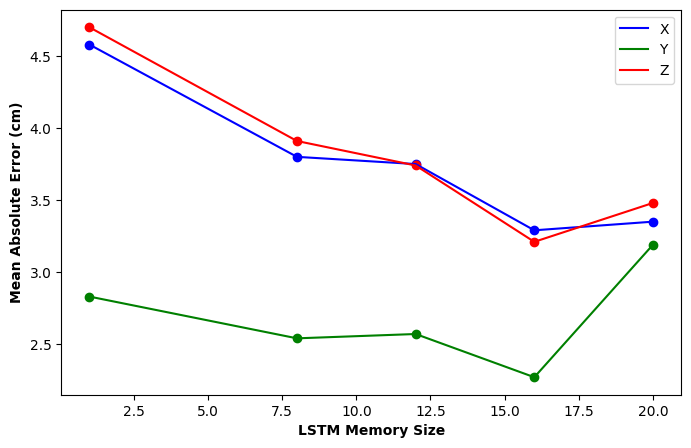

In [34]:
df = pd.DataFrame(np.transpose(data), index=index, columns=columns)
df

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))
x = [1, 8, 12, 16, 20]
ax.set_xlabel('LSTM Memory Size', weight='black')
ax.set_ylabel('Mean Absolute Error (cm)', weight='black')

# Plot the data
ax.plot(x, df.loc['X'], label='X', color='blue')
ax.plot(x, df.loc['Y'], label='Y', color='green')
ax.plot(x, df.loc['Z'], label='Z', color='red')

ax.scatter(x, df.loc['X'], color='blue')
ax.scatter(x, df.loc['Y'], color='green')
ax.scatter(x, df.loc['Z'], color='red')

# Add labels and legend
ax.legend()
plt.show()